PROTIP - type function name with empty paranthesis and press shift+tab inside paranthesis to see documentation

In [11]:
import os
import pandas as pd

In [5]:
data_dir = "./data/titanic"
df = pd.read_csv(os.path.join(data_dir, "train.csv"))
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,NaN,Q
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.00,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.00,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.05,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.00,NaN,S


`y`= dependent variable

`x` = independent variable

In [7]:
y = df["Survived"]
x = df.drop(["Survived", "PassengerId"], axis=1)

In [8]:
x.sample()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
732,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
# Order matters (train, test)

# test_size = what percent of training data goes into test model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [22]:
x_train.shape

(801, 10)

In [23]:
x_test.shape

(90, 10)

---

***Decision Trees*** - nodes, branches, leafs

Prone to overfitting. Overcome by using random forests and using multiple iterations

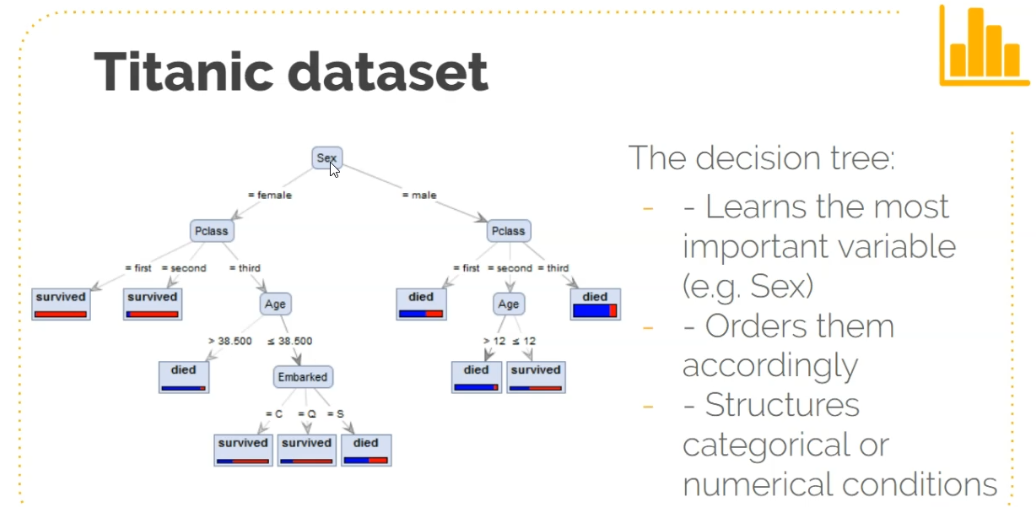

## First ML Model

### Getting started

In [53]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

data_dir = "./data/titanic"
df = pd.read_csv(os.path.join(data_dir, "train.csv"))
df.sample(5)

y = df["Survived"]
x = df.drop(["Survived", "PassengerId"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
# Count number of null values per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# List all of peoples tables
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

titles = sorted(set([x for x in df.Name.map(lambda x: get_title(x))]))
print('Different titles found in the dataset: ')
print(len(titles), ':', titles)

Different titles found in the dataset: 
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [56]:
# Normalize the titles
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ['Jonkheer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
        return 'Royalty'
    elif title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title
    
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title'] = df.apply(replace_titles, axis = 1)
print(df.Title.value_counts())

Mr         517
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Officer      5
Royalty      5
Name: Title, dtype: int64


In [57]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.Sex.replace(('male', 'female'), (0, 1), inplace=True)
df.Embarked.replace(('S', 'C', 'Q'), (0, 1, 2), inplace=True)
df.Title.replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Office', 'Royalty'), (0, 1, 2, 3, 4, 5, 6, 7), inplace=True)

print(df.isnull().sum())
print(df['Sex'].sample(5))
print(df.columns)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64
791    0
161    1
284    0
323    1
127    0
Name: Sex, dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title'],
      dtype='object')


In [58]:
# Correlate 2 columns
corr = df.corr()
corr.Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Name: Survived, dtype: float64

## Machine Learning Model - Putting it all together

In [82]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

data_dir = "../10_Data Science/data/titanic"
df = pd.read_csv(os.path.join(data_dir, "train.csv"))
df.sample(5)

# List all of peoples tables
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
titles = sorted(set([x for x in df.Name.map(lambda x: get_title(x))]))

# Normalize the titles
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ['Jonkheer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
        return 'Royalty'
    elif title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title
    
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title'] = df.apply(replace_titles, axis = 1)

# Normalize data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.Sex.replace(('male', 'female'), (0, 1), inplace=True)
df.Embarked.replace(('S', 'C', 'Q'), (0, 1, 2), inplace=True)
df.Title.replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty'), (0, 1, 2, 3, 4, 5, 6, 7), inplace=True)

y = df["Survived"]
x = df.drop(["Survived", "PassengerId"], axis=1)

# print(x.sample())
# print(y.sample())
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

In [83]:
# Saving the model
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier() # initiate random forest classification
randomforest.fit(x_train, y_train) # train the model
y_pred = randomforest.predict(x_val) # Make some predicions using the x validation
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy: {}".format(acc_randomforest))

pickle.dump(randomforest, open('titanic_model.sav', 'wb'))

Accuracy: 83.33


## Make some ML predictions

In [93]:
df_test = pd.read_csv(os.path.join(data_dir, "test.csv"))

df_test['Title'] = df_test['Name'].map(lambda x: get_title(x))
df_test['Title'] = df_test.apply(replace_titles, axis = 1)

ids = df_test['PassengerId']

df_test['Age'].fillna(df['Age'].median(), inplace=True)
df_test['Fare'].fillna(df['Fare'].median(), inplace=True)
df_test['Embarked'].fillna("S", inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)
df_test.drop("PassengerId", axis=1, inplace=True)
df_test.Sex.replace(('male', 'female'), (0, 1), inplace=True)
df_test.Embarked.replace(('S', 'C', 'Q'), (0, 1, 2), inplace=True)
df_test.Title.replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty'), (0, 1, 2, 3, 4, 5, 6, 7), inplace=True)

df_test.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
110,2,0,41.0,0,0,15.0458,1,0


In [94]:
predictions = randomforest.predict(df_test)
output = pd.DataFrame({ 'PassengerId': ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [97]:
import numpy as np
x = [1, 2, 3, 4, 5]
y = [5, 7, 9, 13, 23]
m, b = np.polyfit(x, y, 1)
print(m, b)

4.2 -1.2000000000000026


## ML Compiled Predictor

Compiled machine learning predictor.

In [ ]:
import os
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data_dir = "./data/titanic"
df = pd.read_csv(os.path.join(data_dir, "train.csv"))

# List all of peoples tables
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# Normalize the titles
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ['Jonkheer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
        return 'Royalty'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title
    
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title'] = df.apply(replace_titles, axis = 1)

# Normalize data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.Sex.replace(('male', 'female'), (0, 1), inplace=True)
df.Embarked.replace(('S', 'C', 'Q'), (0, 1, 2), inplace=True)
df.Title.replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty'), (0, 1, 2, 3, 4, 5, 6, 7), inplace=True)

y = df["Survived"]
x = df.drop(["Survived", "PassengerId"], axis=1)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

randomforest = RandomForestClassifier() # initiate random forest classification
randomforest.fit(x_train, y_train) # train the model

pickle.dump(randomforest, open('titanic_model.sav', 'wb'))

In [ ]:
def prediction_model(pclass, sex, age, sibsp, parch, fare, embarked, title):
    import pickle
    x = [[pclass, sex, age, sibsp, parch, fare, embarked, title]]
    randomforest = pickle.load(open('titanic_model.sav', 'rb'))
    predictions = randomforest.predict(x)
    print(predictions)

prediction_model(1,1,11,1,1,19,1,1)